# Visualizing stratigraphic data from Stratigy in Python

This is a short tutorial on what you can do with data from Stratigy

At first, we get us some Python libraries. simplejson is for parsing JSON formatted data, pandas is for dataframes, urllib2 talks HTTP and matplotlib does the plotting.

In [1]:
import simplejson as json
import pandas as pd
import urllib2
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Now we define where to get the data from. We specify the side id and the API Endpoint. Use localhost with port number if you have Stratigy running locally in development mode or `http://stratigy.danielkerkow.de/data/` if you want to get data from the demo server.

In [2]:
site_id = '44'
api_endpoint = 'http://localhost:5000/data/'

Now we construct the URL with the site id and API endpoint and get the data from the server. We also load the JSON response into a native python dictionary:

In [3]:
url = api_endpoint + site_id
response_json = urllib2.urlopen(url)
site_data = json.load(response_json)

Let's have a look inside:

In [4]:
site_data

{'geometry': {'coordinates': [13, 43], 'type': 'Point'},
 'properties': {'description': 'Description Placeholder',
  'marker-size': 'large',
  'strat_units': {'78': {'depth': 1,
    'loi': 0.8925787,
    'lower_boundary': 1,
    'upper_boundary': 1},
   '79': {'depth': 2,
    'loi': 0.10485864,
    'lower_boundary': 2,
    'upper_boundary': 2},
   '80': {'depth': 3,
    'loi': 0.05788331,
    'lower_boundary': 3,
    'upper_boundary': 3},
   '81': {'depth': 4,
    'loi': 0.72363725,
    'lower_boundary': 4,
    'upper_boundary': 4},
   '82': {'depth': 5,
    'loi': 0.87343967,
    'lower_boundary': 5,
    'upper_boundary': 5},
   '83': {'depth': 6,
    'loi': 0.02176066,
    'lower_boundary': 6,
    'upper_boundary': 6},
   '84': {'depth': 7,
    'loi': 0.39986422,
    'lower_boundary': 7,
    'upper_boundary': 7},
   '85': {'depth': 8,
    'loi': 0.34846959,
    'lower_boundary': 8,
    'upper_boundary': 8},
   '86': {'depth': 9,
    'loi': 0.90826686,
    'lower_boundary': 9,
    'up

You can see that the response is a valid geojson. But for the moment, we are interested in the stratigraphic data nested inside the geojson. We can simply strip it out of the dictionary by selecting the `strat_units` key inside the `properties` dictionary:

In [5]:
strat_data = site_data['properties']['strat_units']
strat_data

{'78': {'depth': 1,
  'loi': 0.8925787,
  'lower_boundary': 1,
  'upper_boundary': 1},
 '79': {'depth': 2,
  'loi': 0.10485864,
  'lower_boundary': 2,
  'upper_boundary': 2},
 '80': {'depth': 3,
  'loi': 0.05788331,
  'lower_boundary': 3,
  'upper_boundary': 3},
 '81': {'depth': 4,
  'loi': 0.72363725,
  'lower_boundary': 4,
  'upper_boundary': 4},
 '82': {'depth': 5,
  'loi': 0.87343967,
  'lower_boundary': 5,
  'upper_boundary': 5},
 '83': {'depth': 6,
  'loi': 0.02176066,
  'lower_boundary': 6,
  'upper_boundary': 6},
 '84': {'depth': 7,
  'loi': 0.39986422,
  'lower_boundary': 7,
  'upper_boundary': 7},
 '85': {'depth': 8,
  'loi': 0.34846959,
  'lower_boundary': 8,
  'upper_boundary': 8},
 '86': {'depth': 9,
  'loi': 0.90826686,
  'lower_boundary': 9,
  'upper_boundary': 9},
 '87': {'depth': 10,
  'loi': 0.80576194,
  'lower_boundary': 10,
  'upper_boundary': 10}}

As you can see, we now have a dictionary containing only records and its properties. We can get a list of the record ids by taking the dictionaries keys:

In [6]:
strat_data.keys()

['86', '84', '82', '83', '80', '81', '85', '87', '79', '78']

Now we want to get an overview of the stratigraphic data itself. For further analysis and plotting it is better to have that in a table. So we construct a DataFrame from it:

In [7]:
df = pd.DataFrame.from_dict(strat_data, orient='index')
df

,depth,loi,lower_boundary,upper_boundary
78,1,0.892579,1,1
79,2,0.104859,2,2
80,3,0.057883,3,3
81,4,0.723637,4,4
82,5,0.873440,5,5
83,6,0.021761,6,6
84,7,0.399864,7,7
85,8,0.348470,8,8
86,9,0.908267,9,9
87,10,0.805762,10,10


We could now go further with analysis of the table data, but I won't cover this here for now. Let's go ahead and plot the data.

## Plotting

When working with stratigraphic data, it is very common to plot measured data against the depth on the inverted y-axis, so you look on the plot like you would look on an outcrop, measuring depth from the top to the bottom. With this kind of plot you can visualize measurement curves, categorial layer segments or parallel comparisons. 

For now, I just want to plot the loss on ignition measurement agains the depth. Therefore we create a figure with a size of (2,6) and select the data. Here we just select `df['loi']` for the x-axis and `df['depth']` for the y-axis. The y-axis is inverted with `plt.gca().invert_yaxis()` and the rest is just a little bit of cosmetics.

Now we have a nice little plot for data retrieved from the Stratigy database!

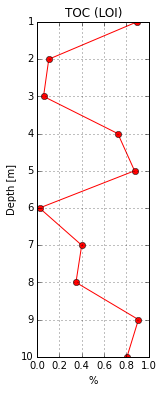

In [20]:
fig = plt.figure(figsize=(2, 6))
plt.plot(df['loi'], df['depth'], 'ro-')
plt.gca().invert_yaxis()
plt.title('TOC (LOI)')
plt.xlabel('%')
plt.ylabel('Depth [m]')
plt.grid(True)
plt.show()